# Part 1: Import Libraries and Dataset

In [1]:
# 1.1: Import Libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [2]:
# 1.2: Import and Understand Each Dataset

# Cab DataFrame
# Import Data
cab_df = pd.read_csv('/kaggle/input/data-glacier-week-2/Cab_Data.csv')
cab_df_preview = cab_df.head(3)

In [3]:
# Data Info
cab_df_info = cab_df.info()
cab_df_dtypes = cab_df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [4]:
# Change the type of Date of Travel Column
cab_df['Date of Travel'] = pd.to_datetime(pd.Timestamp('1899-12-29') + pd.to_timedelta(cab_df['Date of Travel'], unit='D'), format='%y/%m/%d')

In [5]:
# Data Description
cab_df_desc = cab_df.describe()
company_unique = cab_df['Company'].unique()
city_unique = cab_df['City'].unique()

In [6]:
# City DataFrame
# Import Data
city_df = pd.read_csv('/kaggle/input/data-glacier-week-2/City.csv')
city_df_preview = city_df.head(3)

In [7]:
# Data Info
city_df_info = city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [8]:
# Change Datatype
city_df['Population'] = city_df['Population'].str.replace(',', '').astype(float)
city_df['Users'] = city_df['Users'].str.replace(',', '').astype(float)

In [9]:
# Data Description
city_df_desc = city_df.describe()
city_users_percentage = (city_df['Users'] / city_df['Population']) * 100

In [10]:
# Transaction ID DataFrame
# Import Data
transaction_id_df = pd.read_csv('/kaggle/input/data-glacier-week-2/Transaction_ID.csv')
transaction_id_df_preview = transaction_id_df.head()

In [11]:
# Data Info
transaction_id_df_info = transaction_id_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [12]:
# Data Description
transaction_id_df_desc = transaction_id_df.describe()

In [13]:
# Customer ID DataFrame
# Import Data
customer_id_df = pd.read_csv('/kaggle/input/data-glacier-week-2/Customer_ID.csv')
customer_id_df_preview = customer_id_df.head()

In [14]:
# Data Info
customer_id_df_info = customer_id_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [33]:
# Data Description
customer_id_df_desc = customer_id_df.describe()

In [46]:
# Part 2: Merge and Visualize the Whole Dataset

# 2.1: Merge the Whole Dataset
df = pd.merge(cab_df, transaction_id_df, on='Transaction ID')
df = pd.merge(df, customer_id_df, on='Customer ID')
df = pd.merge(df, city_df, on='City')
df_preview = df.head(2)

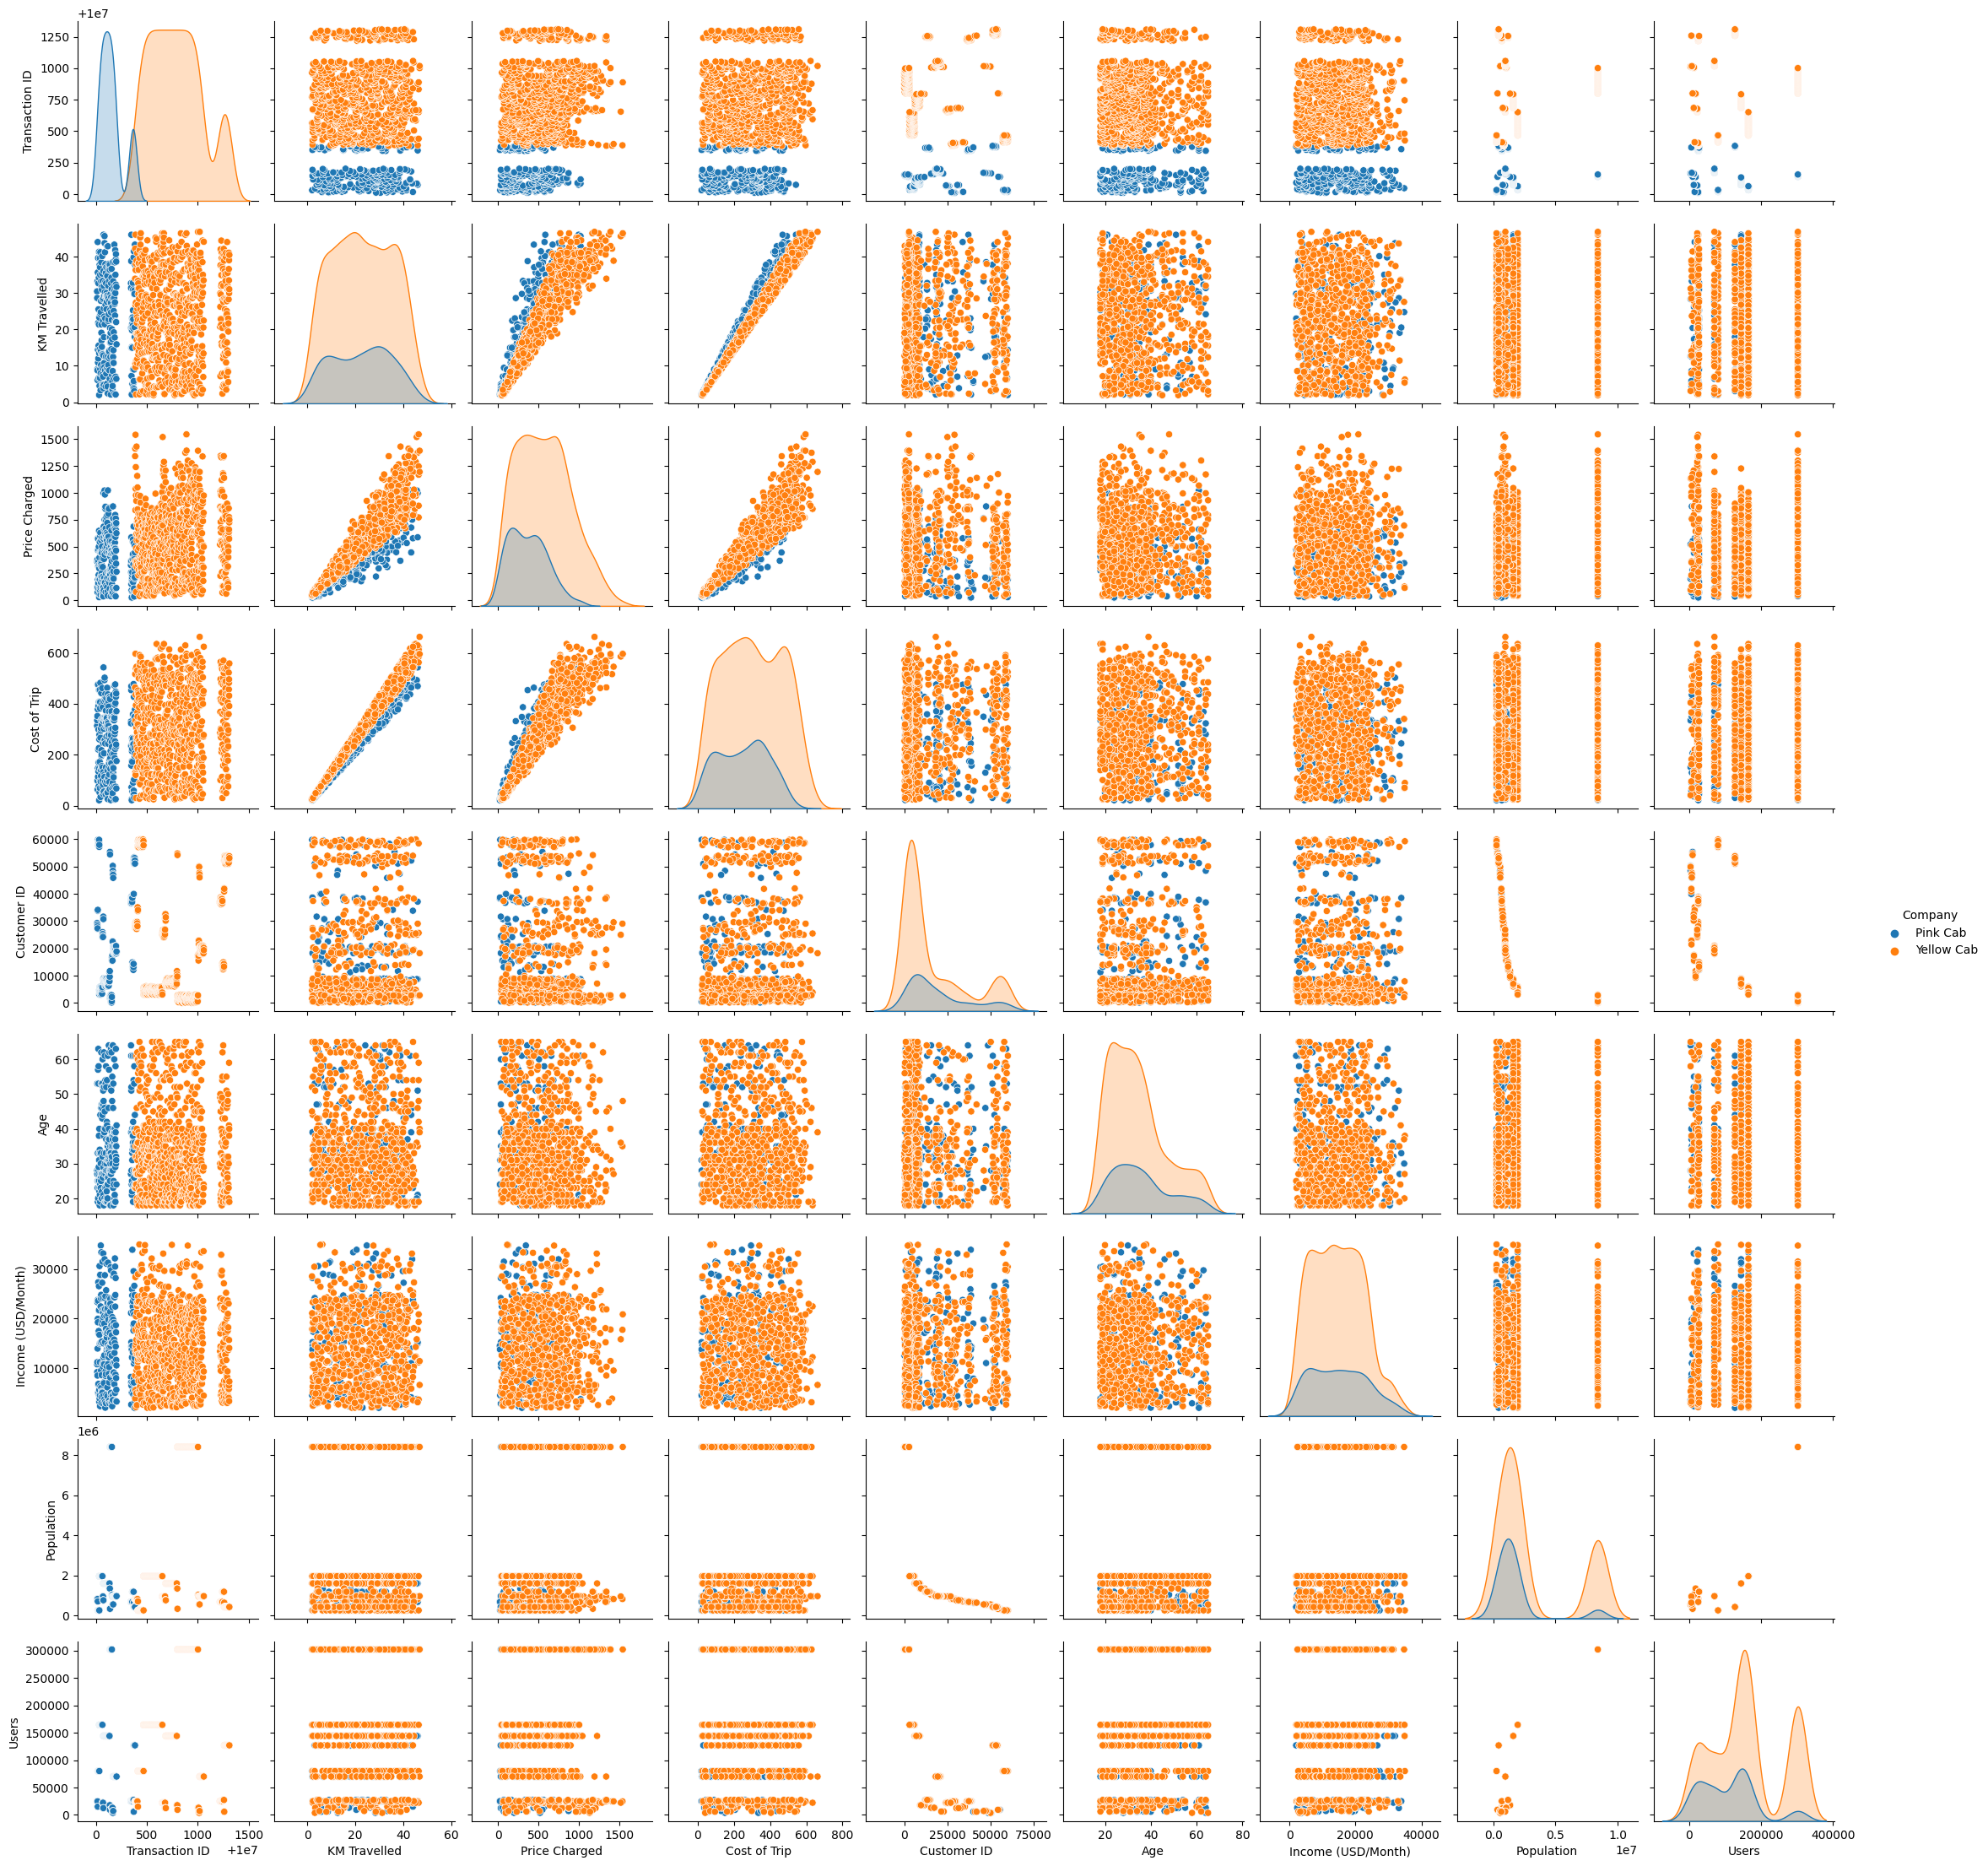

In [47]:
# 2.2: Visualize the Data
sns.pairplot(df.head(1000), hue='Company')

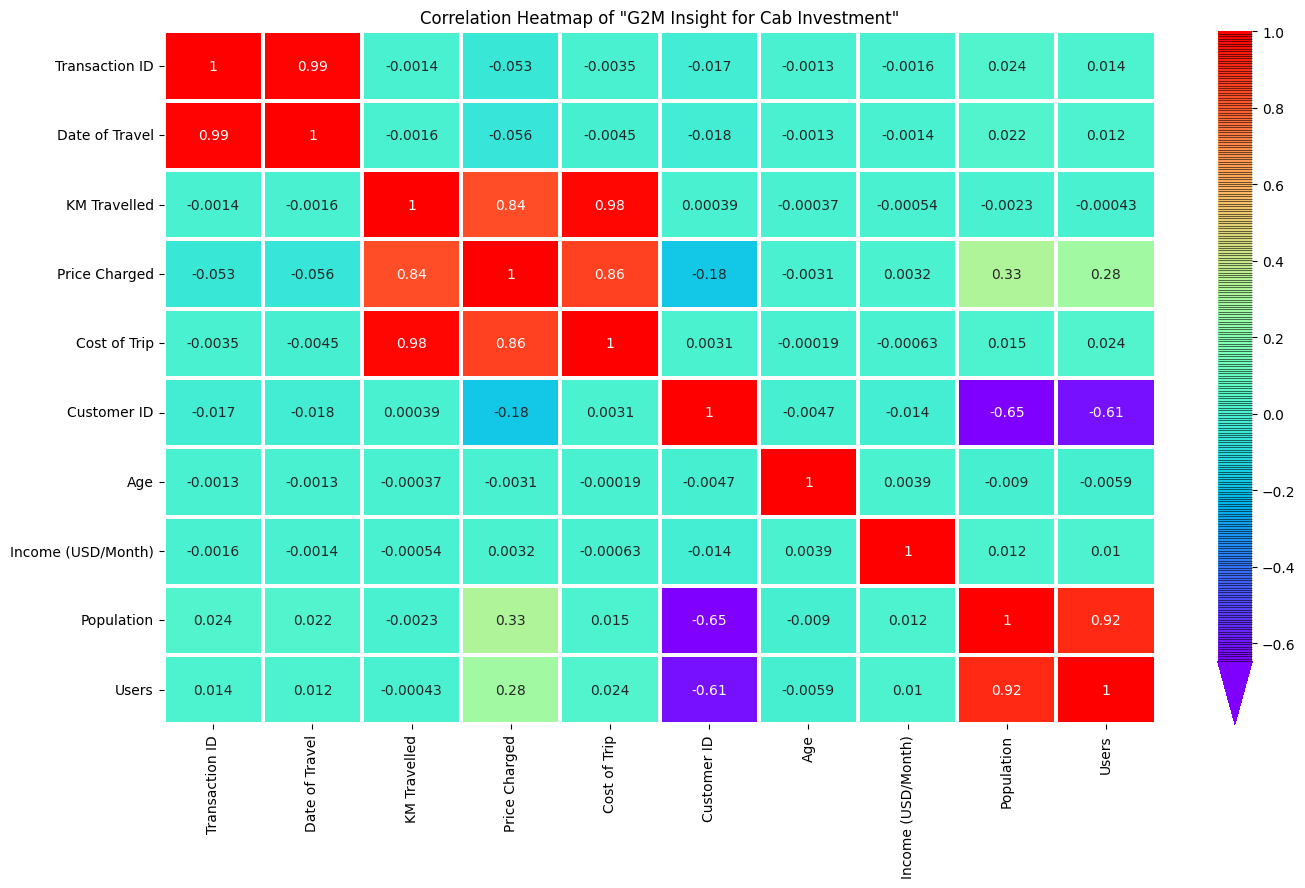

In [35]:
# 2.3: Check the Correlation

# Get the data types of all columns
dtypes = df.dtypes

# Filter out numeric columns
numeric_cols = dtypes[dtypes != object].index

# Subset the DataFrame to include only numeric columns
numeric_df = df[numeric_cols]

# Calculate correlation matrix
data_corr = numeric_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(16, 9))
ax = sns.heatmap(data_corr, cmap='rainbow', annot=True, linewidth=1.5, cbar_kws={"shrink": 1, "extend": "min", "extendfrac": 0.1, "drawedges": True})
plt.title('Correlation Heatmap of "G2M Insight for Cab Investment"')
plt.show()

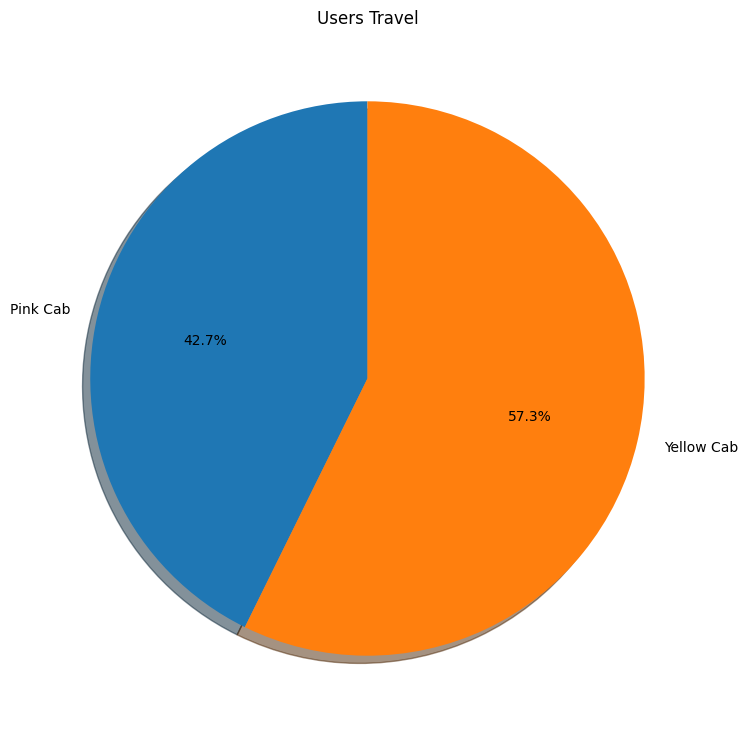

In [36]:
# Part 3: Investigate the Data

# 3.1: User Travel
user_avg = df.groupby('Company')['Users'].mean()
plt.figure(figsize=(16, 9))
plt.pie(user_avg, labels=user_avg.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Users Travel')
plt.show()

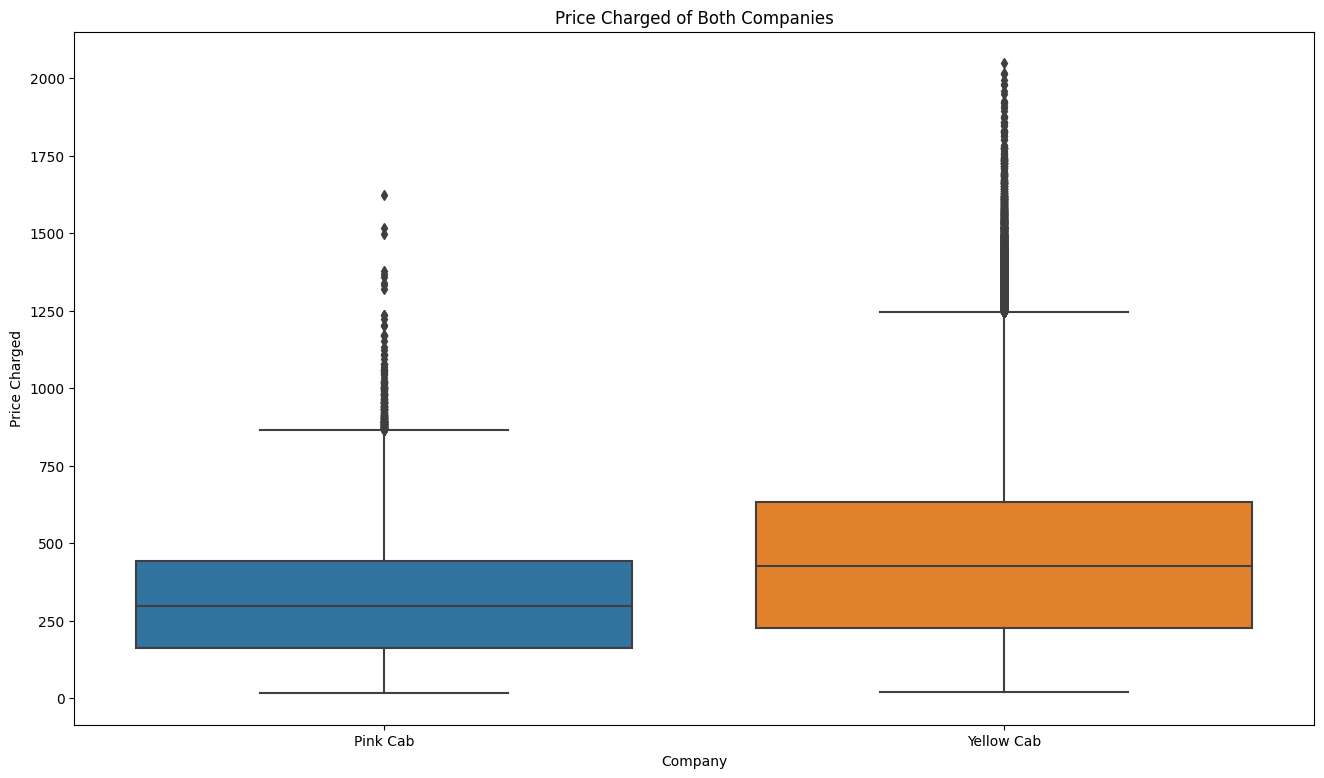

In [37]:
# 3.2: Price Charged
plt.figure(figsize=(16, 9))
sns.boxplot(x=df['Company'], y=df['Price Charged'])
plt.title('Price Charged of Both Companies')
plt.xlabel('Company')
plt.ylabel('Price Charged')
plt.show()

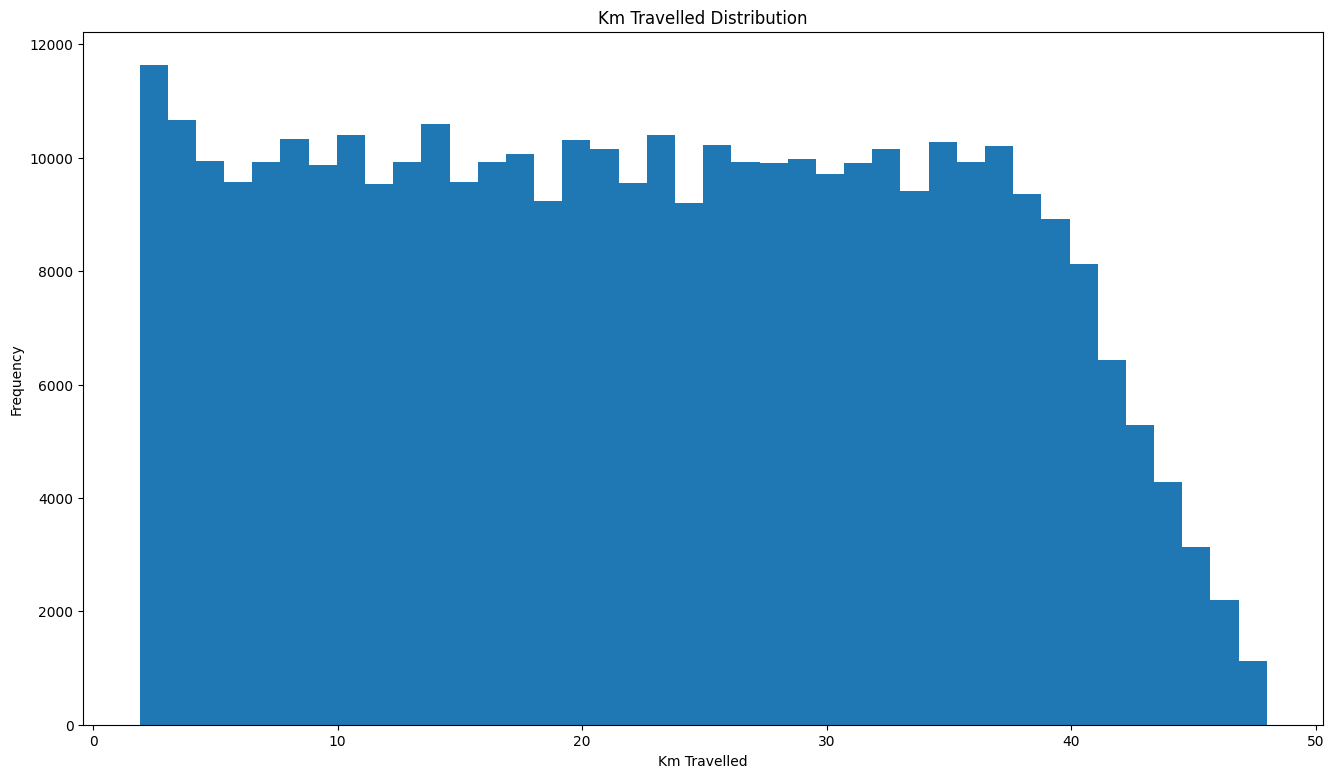

In [38]:
# 3.3: KM Travelled Distribution
plt.figure(figsize=(16, 9))
plt.hist(df['KM Travelled'], bins=40)
plt.title('Km Travelled Distribution')
plt.ylabel('Frequency')
plt.xlabel('Km Travelled')
plt.show()

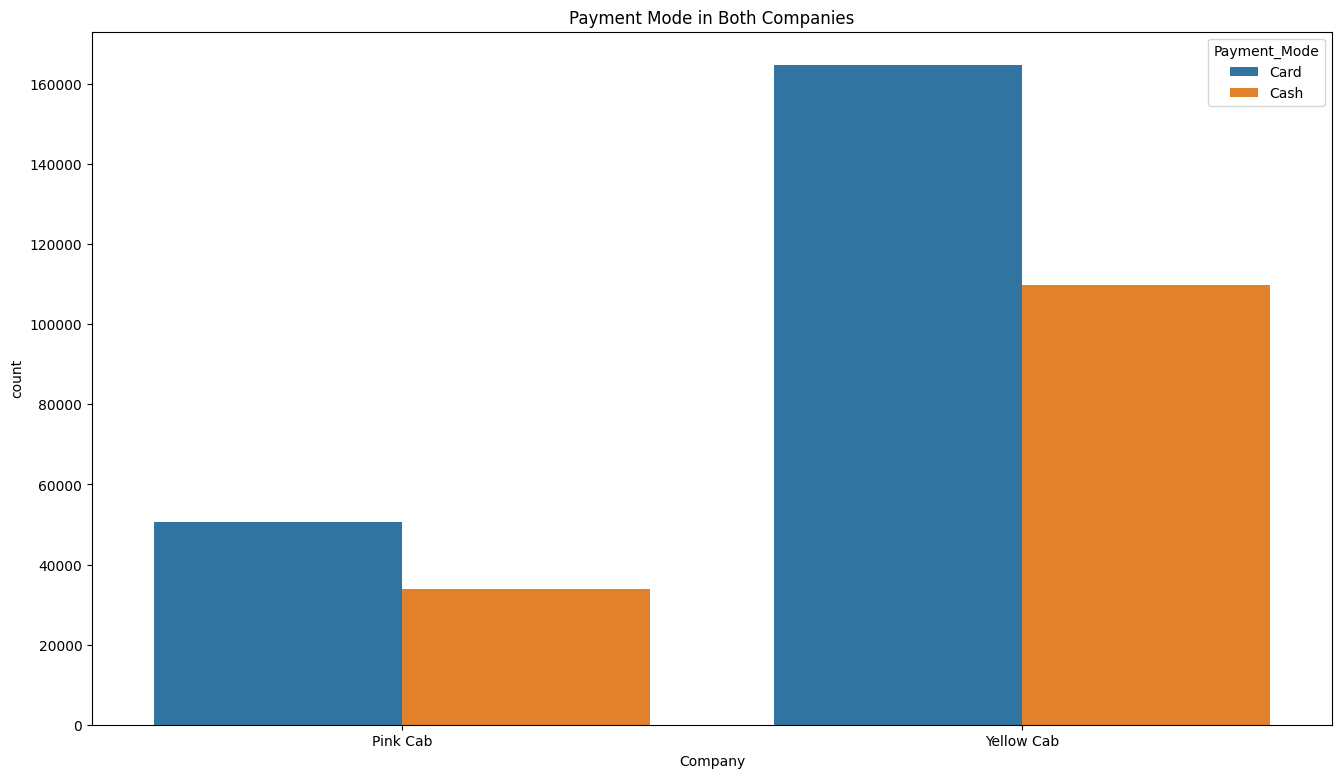

In [39]:
# 3.4: Payment Mode
plt.figure(figsize=(16, 9))
sns.countplot(x="Company", hue="Payment_Mode", data=df)
plt.title('Payment Mode in Both Companies')
plt.show()

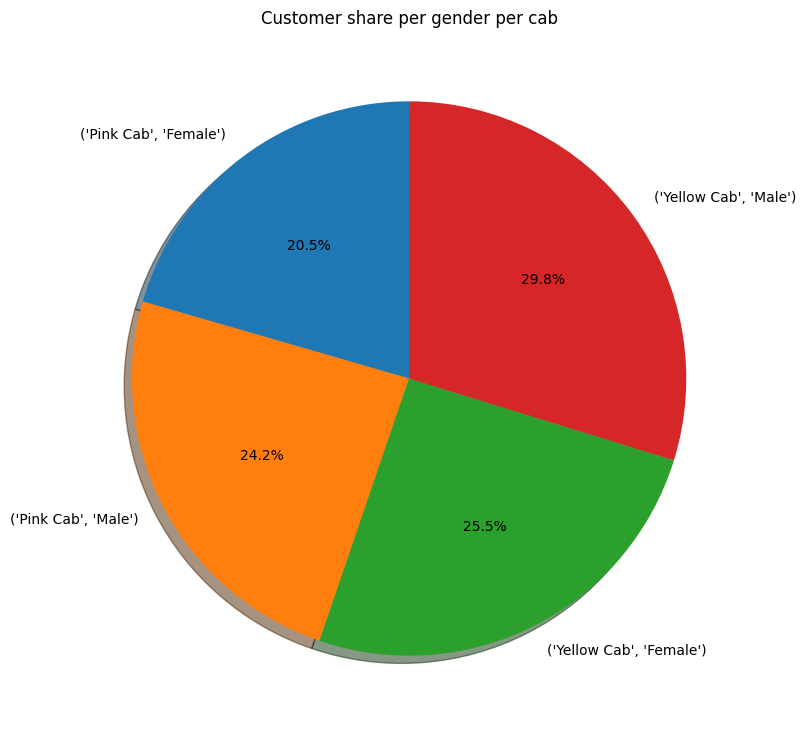

In [40]:
# 3.5: Gender
gender_counts = df.groupby(['Company', 'Gender'])['Customer ID'].nunique()
plt.figure(figsize=(16, 9))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Customer share per gender per cab')
plt.show()

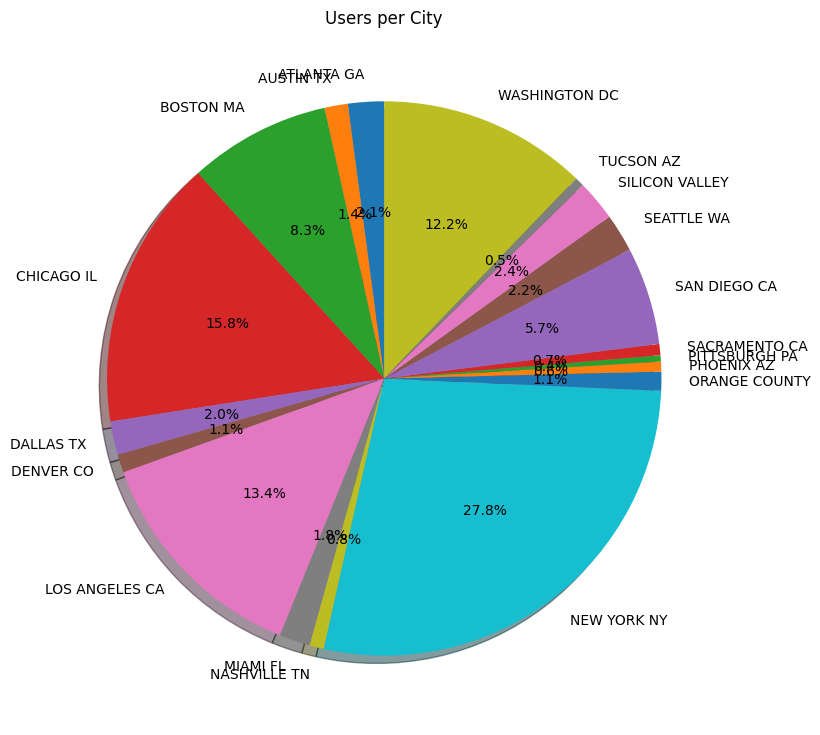

In [41]:
# 3.6: Users Respective Cities
plt.figure(figsize=(16, 9))
city_users = df.groupby('City')['Users'].count()
plt.pie(city_users, labels=city_users.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Users per City')
plt.show()

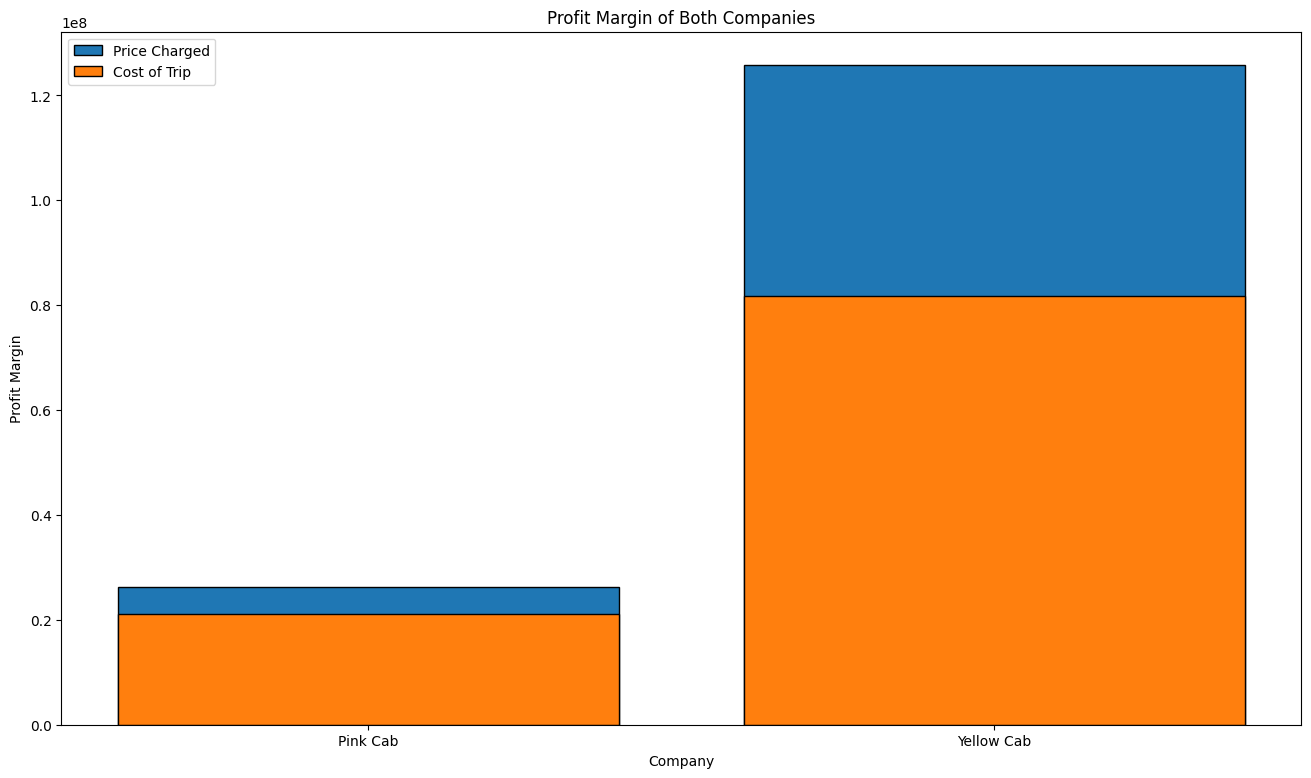

In [42]:
# 3.7: Profit Margin
plt.figure(figsize=(16, 9))
company_profit = df.groupby('Company')[['Price Charged', 'Cost of Trip']].sum()
company_profit['Profit Margin'] = company_profit['Price Charged'] - company_profit['Cost of Trip']

plt.bar(company_profit.index, company_profit['Price Charged'], edgecolor='black', label='Price Charged')
plt.bar(company_profit.index, company_profit['Cost of Trip'], edgecolor='black', label='Cost of Trip')
plt.xlabel('Company')
plt.ylabel('Profit Margin')
plt.title('Profit Margin of Both Companies')
plt.legend()
plt.show()

<Figure size 1600x900 with 0 Axes>

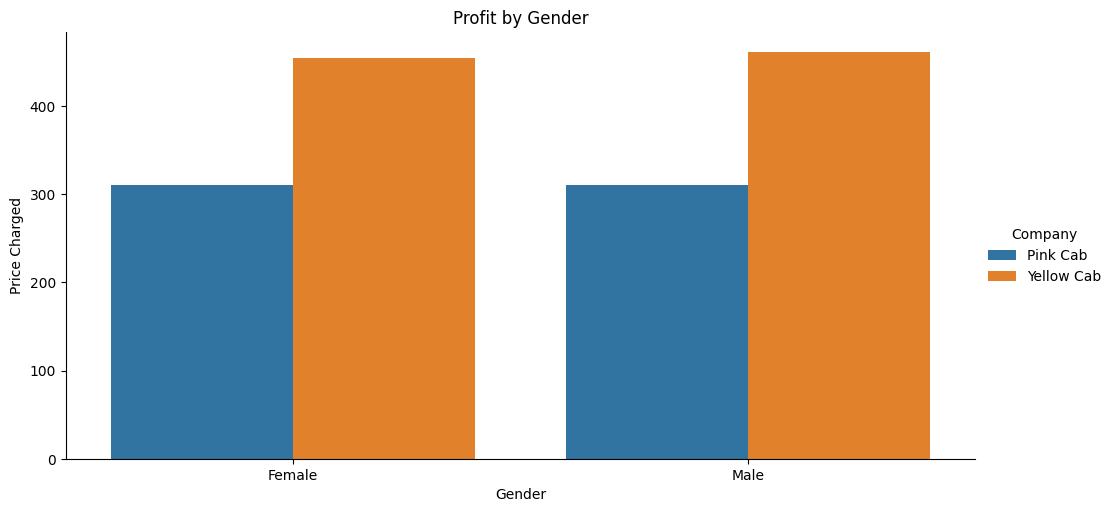

In [43]:
# 3.8: Profit by Gender
plt.figure(figsize=(16, 9))
gender_profit = df.groupby(['Company', 'Gender'])[['Price Charged', 'Cost of Trip']].mean().reset_index()
g = sns.catplot(x='Gender', y='Price Charged', hue='Company', data=gender_profit, kind='bar', aspect=2)
plt.title('Profit by Gender')
plt.show()

<Figure size 1600x900 with 0 Axes>

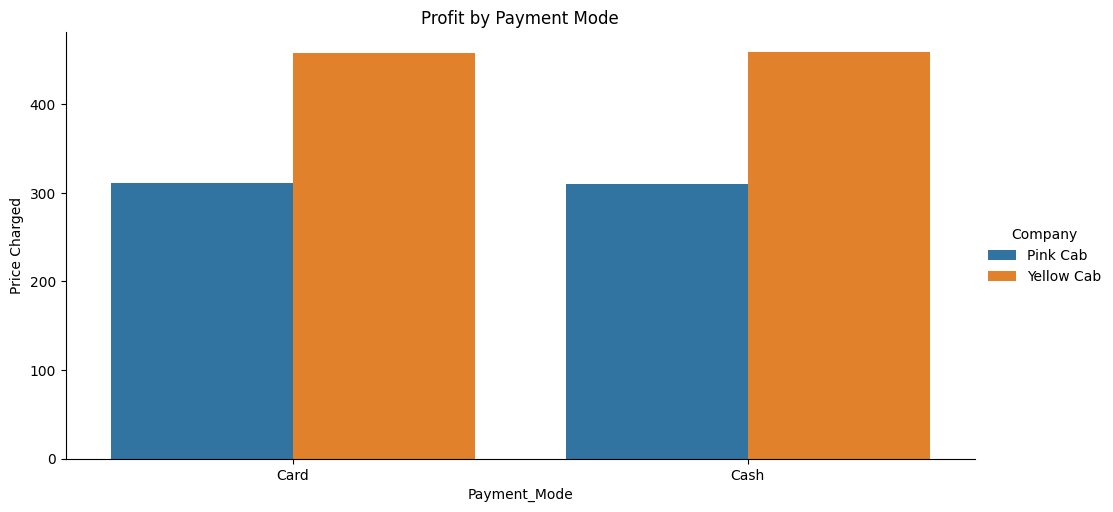

In [44]:
# 3.9: Profit by Payment Mode
plt.figure(figsize=(16, 9))
payment_profit = df.groupby(['Company', 'Payment_Mode'])[['Price Charged', 'Cost of Trip']].mean().reset_index()
g = sns.catplot(x='Payment_Mode', y='Price Charged', hue='Company', data=payment_profit, kind='bar', aspect=2)
plt.title('Profit by Payment Mode')
plt.show()

<Figure size 1600x900 with 0 Axes>

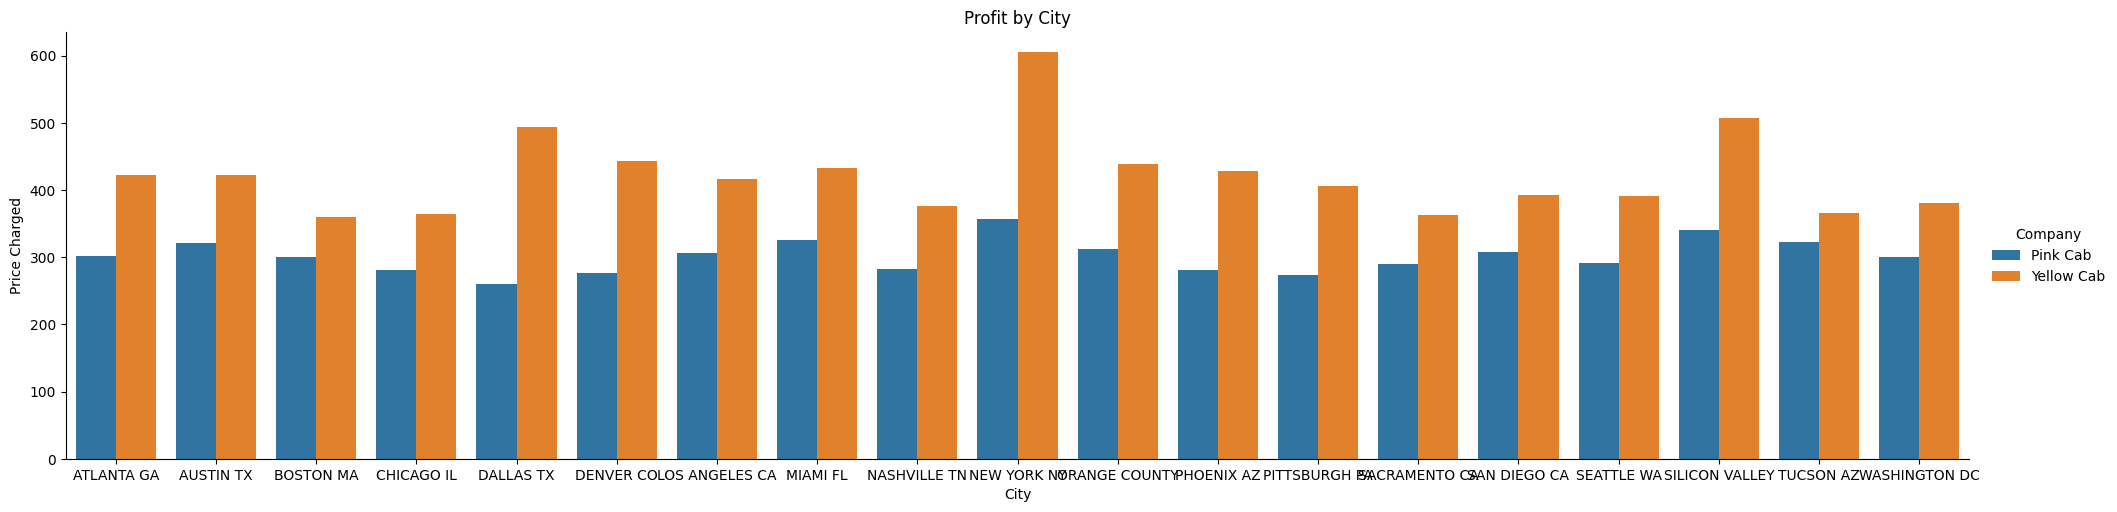

In [45]:
# 3.10: Profit by City
plt.figure(figsize=(16, 9))
city_profit = df.groupby(['Company', 'City'])[['Price Charged', 'Cost of Trip']].mean().reset_index()
g = sns.catplot(x='City', y='Price Charged', hue='Company', data=city_profit, kind='bar', aspect=4)
plt.title('Profit by City')
plt.show()